In [82]:
#We'll need the following libraries: pandas, numpy, nltk, and sklearn

import pandas as pd

In [83]:
import numpy as np

In [84]:
import nltk

In [85]:
import sklearn

In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [87]:
from sklearn.metrics import classification_report

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
data = pd.read_csv('Data.csv')

In [91]:
data

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,03-01-2000,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,04-01-2000,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,05-01-2000,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,06-01-2000,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,07-01-2000,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,27-06-2016,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by Franc

In [92]:
data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [93]:
data.duplicated().sum()

0

In [94]:
data.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [96]:
data.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [97]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,03-01-2000,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,04-01-2000,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,05-01-2000,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,06-01-2000,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,07-01-2000,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [98]:
train=data[data['Date']<'20150101']
test=data[data['Date']>'20141231']
train.shape

(2705, 27)

In [99]:
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]", " ",regex=True, inplace=True)

In [100]:
data.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [101]:
for col in data.columns:
    data[col]=data[col].str.lower()
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [102]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [104]:
tfvector=TfidfVectorizer(ngram_range=(2,3))

In [107]:
train_df=tfvector.fit_transform(headlines)

In [108]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')

In [109]:
randomclassifier.fit(train_df,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [110]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [111]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = tfvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

[[105 588]
 [110 593]]
0.5
              precision    recall  f1-score   support

           0       0.49      0.15      0.23       693
           1       0.50      0.84      0.63       703

    accuracy                           0.50      1396
   macro avg       0.50      0.50      0.43      1396
weighted avg       0.50      0.50      0.43      1396

Confusion matrix, without normalization


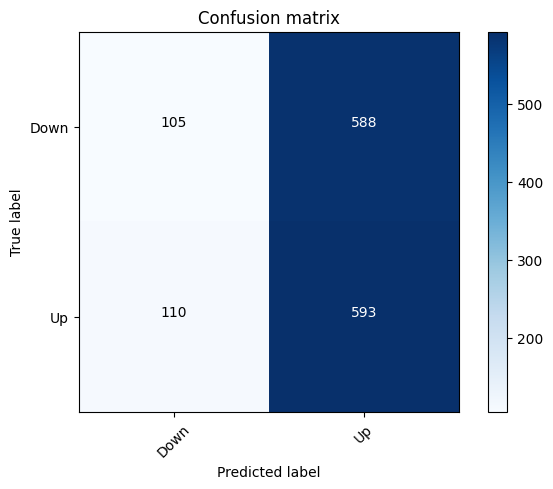

In [112]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

In [113]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_df,train['Label'])
MultinomialNB()

MultinomialNB()

[[  5 688]
 [ 13 690]]
0.4978510028653295
              precision    recall  f1-score   support

           0       0.28      0.01      0.01       693
           1       0.50      0.98      0.66       703

    accuracy                           0.50      1396
   macro avg       0.39      0.49      0.34      1396
weighted avg       0.39      0.50      0.34      1396

Confusion matrix, without normalization


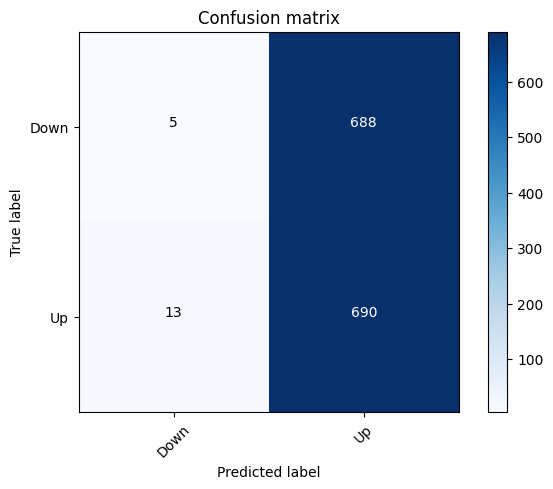

In [114]:
predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

In [115]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()
pa.fit(train_df,train['Label'])

PassiveAggressiveClassifier()

[[139 554]
 [147 556]]
0.4978510028653295
              precision    recall  f1-score   support

           0       0.49      0.20      0.28       693
           1       0.50      0.79      0.61       703

    accuracy                           0.50      1396
   macro avg       0.49      0.50      0.45      1396
weighted avg       0.49      0.50      0.45      1396

Confusion matrix, without normalization


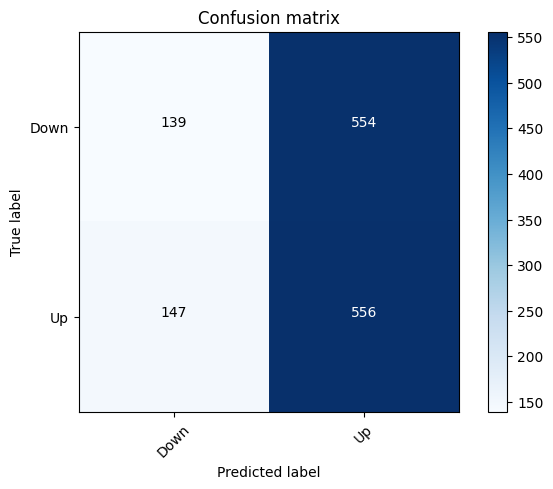

In [116]:
predictions = pa.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
#implement bag of words
bow=CountVectorizer(ngram_range=(2,3))
train_df=bow.fit_transform(headlines)

In [118]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(train_df,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [119]:
predictions = randomclassifier.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[  0 693]
 [  0 703]]
0.5035816618911175
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       693
           1       0.50      1.00      0.67       703

    accuracy                           0.50      1396
   macro avg       0.25      0.50      0.33      1396
weighted avg       0.25      0.50      0.34      1396



C:\Users\reshm\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\reshm\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\reshm\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[126 567]
 [128 575]]
0.5021489971346705
              precision    recall  f1-score   support

           0       0.50      0.18      0.27       693
           1       0.50      0.82      0.62       703

    accuracy                           0.50      1396
   macro avg       0.50      0.50      0.44      1396
weighted avg       0.50      0.50      0.45      1396

Confusion matrix, without normalization


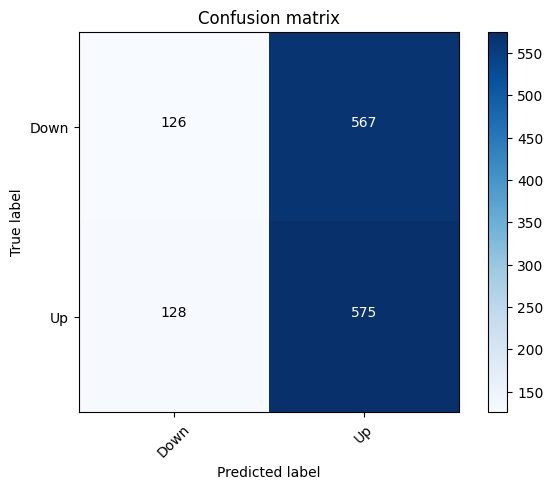

In [120]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(train_df,train['Label'])

predictions = nb.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

[[195 498]
 [204 499]]
0.497134670487106
              precision    recall  f1-score   support

           0       0.49      0.28      0.36       693
           1       0.50      0.71      0.59       703

    accuracy                           0.50      1396
   macro avg       0.49      0.50      0.47      1396
weighted avg       0.49      0.50      0.47      1396

Confusion matrix, without normalization


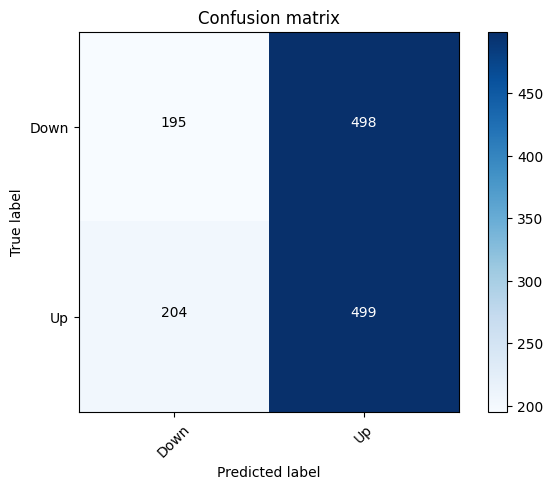

In [121]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()
pa.fit(train_df,train['Label'])

predictions = pa.predict(test_dataset)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])